# Clustering con Kmeans - Ejemplo 1

https://cartography-playground.gitlab.io/playgrounds/clustering-comparison/

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

In [1]:
from sklearn.datasets import make_blobs # Para crear el dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
X, y = make_blobs(n_samples = 100, n_features = 2 ,centers = 4 ,cluster_std =[1, 1.5, 2, 2], random_state = 7) # Creamos los datos con los que vamos a trabajar

In [11]:
#Con los datos creamos un DataFrame
df_blobs = pd.DataFrame({
    'X1': X[:, 0],
    'X2': X[:, 1],
    'y': y
})

In [12]:
df_blobs

,X1,X2,y
0,-3.384261,5.221740,1
1,-1.836238,-7.735384,3
2,-7.456176,6.198874,0
3,-1.785043,1.609749,1
4,-10.124910,6.133805,0
...,...,...,...
95,7.072755,-0.259937,2
96,-2.626873,-7.228570,3
97,-1.521099,1.802284,1
98,-9.216388,6.670846,0


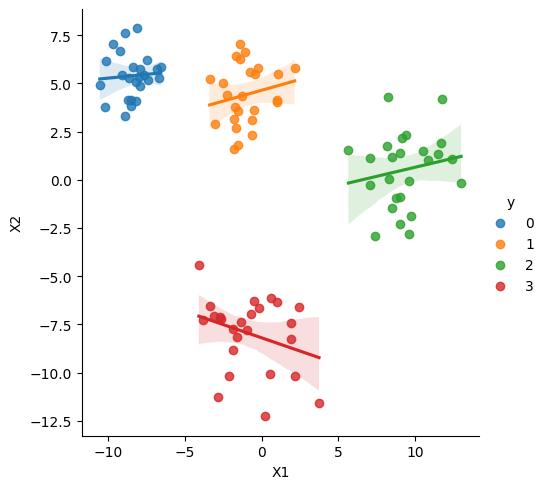

In [16]:
#Graficamos nuestros datos
sns.lmplot(x = 'X1', y = 'X2', hue = 'y',data = df_blobs)

In [20]:
# La variable X tiene dos columnas que representan la posición de cada punto y la variable y es el cluster
X, y = df_blobs[['X1', 'X2']], df_blobs['y']

In [21]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 4, random_state = 7) #instanciamos a Kmeans

In [22]:
kmeans.fit(X) # Ajustamos el modelo a los datos de posición de los puntos

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=7)

In [24]:
y_pred = kmeans.predict(X) #Nos entrega la clusterización del modelo

**Punto importante:** 

* El modelo va a entregar numeros de clusters que no necesariamente son los mismos numeros de la base original, ya que la idea del numero es solo determinar a que pertenece a algún cluster.

* Ejemplo: data real tiene 5 puntos con el cluster numero 1 y en la predicción puede tener los mismos 5 puntos pero como cluster numero 3.

In [25]:
y_pred

array([3, 2, 0, 3, 0, 3, 2, 1, 0, 2, 2, 1, 2, 0, 3, 2, 2, 1, 2, 0, 3, 0,
       0, 2, 1, 0, 1, 1, 2, 3, 2, 2, 3, 2, 2, 0, 1, 0, 3, 0, 2, 3, 3, 1,
       3, 1, 0, 0, 1, 0, 1, 2, 1, 2, 3, 0, 3, 2, 3, 3, 3, 2, 3, 1, 0, 1,
       0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 1, 1, 2, 3, 3, 3, 0, 2, 1, 2, 1, 0,
       0, 3, 2, 3, 0, 2, 1, 1, 2, 3, 0, 3], dtype=int32)

# Clustering con Kmeans - Ejemplo 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.datasets import make_blobs # Para la creación de los datasets
from sklearn.cluster import KMeans # modelo a utilizar
from sklearn.metrics import silhouette_score # validación coeficiente de silueta para ver que tan bien está hecho nuestro cluster
from yellowbrick.cluster import SilhouetteVisualizer #para visualizar el coeficiente de silueta

# Preparando los datos de prueba

In [3]:
X, y, c = make_blobs(n_samples = 500, n_features = 2, centers = 4, cluster_std = 0.8, return_centers = True, random_state = 7) # creamos nuestra base a trabajar

#### revisaremos lo que contiene cada variable

In [4]:
X #las dos dimensiones de cada punto a graficar

array([[-3.20970080e-01,  4.33870484e+00],
       [-2.23158623e+00,  3.27123290e+00],
       [-8.55996787e+00,  4.47723611e+00],
       [ 1.11800155e-01,  3.98729506e+00],
       [-5.57966741e-01, -9.80857401e+00],
       [-7.09965017e+00,  5.23187441e+00],
       [-9.46864822e+00,  5.18643407e+00],
       [-8.03016996e+00,  5.69748057e+00],
       [-5.57788287e-01, -9.01673032e+00],
       [ 9.41274214e+00, -3.60759889e-01],
       [-1.37260529e+00, -8.66235506e+00],
       [ 9.94380837e-02, -8.93140560e+00],
       [ 9.26152910e+00, -2.93907878e-01],
       [-8.63065606e+00,  5.12575999e+00],
       [-8.89417799e+00,  5.82582299e+00],
       [-7.33245729e+00,  5.72385103e+00],
       [ 1.23744703e+00, -7.70355443e+00],
       [-8.54965457e+00,  6.55284458e+00],
       [-1.75504669e+00,  3.51200533e+00],
       [-5.60897678e-01, -8.47368996e+00],
       [-9.43721009e+00,  6.76795635e+00],
       [-7.54902929e-01,  4.42595141e+00],
       [ 8.73892819e+00,  5.12609527e-01],
       [ 2.

In [5]:
y # El cluster a que pertenecen todos los datos

array([1, 1, 0, 1, 3, 0, 0, 0, 3, 2, 3, 3, 2, 0, 0, 0, 3, 0, 1, 3, 0, 1,
       2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 3, 0, 2, 2, 0, 3, 3, 2, 3, 3, 0, 0,
       3, 3, 3, 3, 0, 2, 0, 0, 1, 1, 2, 1, 3, 0, 2, 1, 1, 0, 1, 1, 0, 3,
       1, 1, 0, 2, 1, 1, 3, 2, 2, 1, 3, 1, 0, 1, 3, 2, 0, 0, 2, 2, 1, 1,
       1, 1, 2, 0, 1, 0, 3, 2, 3, 1, 0, 3, 3, 2, 3, 0, 3, 3, 1, 0, 0, 2,
       1, 1, 3, 2, 0, 0, 2, 0, 3, 1, 2, 1, 0, 2, 2, 3, 0, 0, 3, 1, 2, 1,
       0, 0, 2, 1, 1, 1, 3, 0, 0, 0, 2, 0, 2, 1, 3, 3, 1, 3, 3, 3, 1, 3,
       3, 3, 0, 2, 3, 2, 1, 0, 2, 0, 3, 3, 3, 2, 3, 2, 0, 1, 0, 2, 2, 0,
       0, 3, 2, 3, 1, 0, 3, 1, 1, 0, 3, 1, 2, 3, 3, 0, 1, 2, 0, 2, 2, 2,
       3, 1, 2, 1, 1, 3, 1, 0, 1, 3, 3, 2, 2, 0, 0, 3, 3, 2, 1, 2, 2, 1,
       0, 3, 2, 2, 0, 2, 3, 2, 0, 0, 2, 2, 0, 2, 3, 0, 0, 1, 1, 1, 0, 3,
       3, 1, 1, 1, 3, 1, 3, 1, 0, 0, 0, 3, 0, 3, 0, 2, 2, 1, 1, 3, 2, 3,
       3, 3, 0, 3, 0, 0, 2, 0, 1, 2, 2, 3, 2, 3, 1, 0, 2, 2, 2, 1, 2, 3,
       1, 0, 3, 0, 3, 2, 0, 0, 2, 0, 0, 1, 3, 0, 0,

In [6]:
c # los 4 centroides

array([[-8.47383421,  5.59837584],
       [-1.23181537,  4.46930356],
       [ 9.55979024,  0.76991741],
       [ 0.02240927, -8.55897733]])

In [7]:
# creamos el dataframe
df_blobs = pd.DataFrame({
                'X1': X[ : , 0],
                'X2': X[ : , 1],
                'y': y
                        })

In [8]:
# Creación de DataFrame de los centroides
df_centers = pd.DataFrame({
    'X1': c[ : , 0],
    'X2': c[ : , 1]
                    } )

# Visualización de datos

<Axes: xlabel='X1', ylabel='X2'>

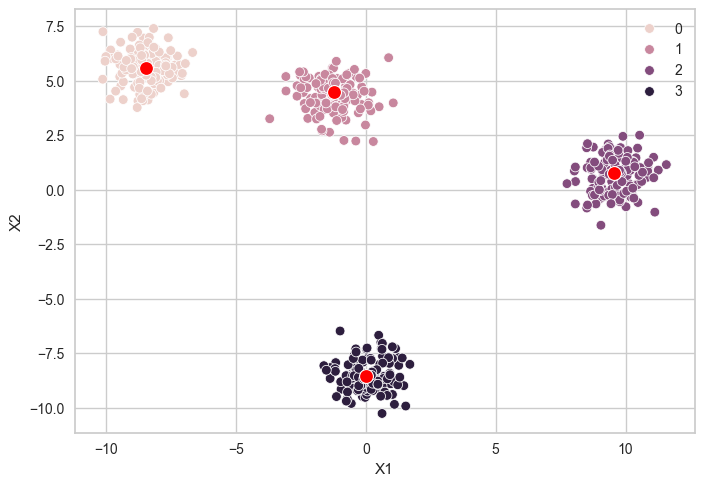

In [9]:
sns.scatterplot(data = df_blobs, x = 'X1', y = 'X2', hue = 'y')
sns.scatterplot(data = df_centers, x = 'X1', y = 'X2', color = 'red', marker = 'o', s = 100)# Graficamos los centroides

# Aplicando KMeans

In [10]:
Kmeans = KMeans(n_clusters = 3) #Aunque es evidente tener 4 clusters, pusimos 3 para ver como lo resuelve el modelo.
df_clusters = Kmeans.fit_predict(X) #X contiene los las coordenadas de todos los puntos

df_blobs['cluster'] = df_clusters # agregamos al DF la columna de predicción
Kmeans_centers = Kmeans.cluster_centers_ #estos son los centroides que me da el modelo

#Esta paso lo hacemos para poder graficar en el eje x e y
df_kmeans_center = pd.DataFrame({
    'X1' : Kmeans_centers[ : , 0],
    'X2' : Kmeans_centers[ : , 1]
})

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='X1', ylabel='X2'>

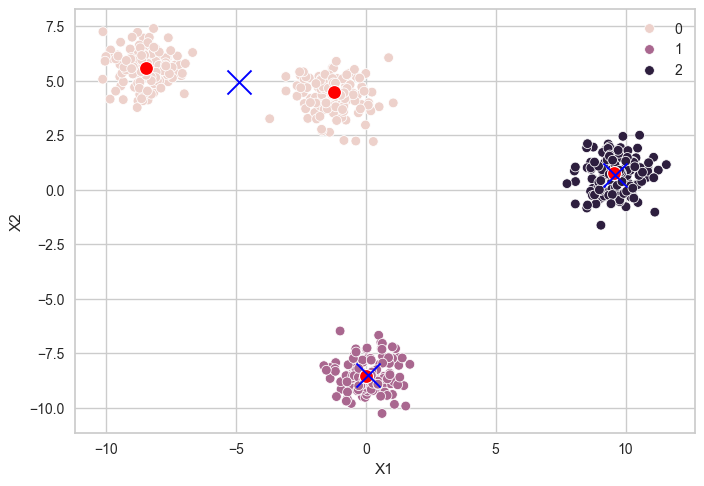

In [11]:
sns.scatterplot(data = df_blobs, x = 'X1', y = 'X2', hue = 'cluster') # graficamos los datos y diferenciamos el color del cluster con la predicción
sns.scatterplot(data = df_centers, x = 'X1', y = 'X2', color = 'red', marker = 'o', s = 100) # centroides reales de la data
sns.scatterplot(data = df_kmeans_center, x = 'X1', y = 'X2', s = 300, color = 'blue', marker = 'x') # Centroides predichos

Ahora vamos a evaluar de manera correcta el modelo utilizando los 4 centroides

In [12]:
Kmeans = KMeans(n_clusters = 4) # pusimos 4 centroides debido a lo evidente de la grafica.
df_clusters = Kmeans.fit_predict(X)

df_blobs['cluster'] = df_clusters # agregamos al DF la columna de predicción
Kmeans_centers = Kmeans.cluster_centers_ #estos son los centroides que me da el modelo

df_kmeans_center = pd.DataFrame({
    'X1' : Kmeans_centers[ : , 0],
    'X2' : Kmeans_centers[ : , 1]
})

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='X1', ylabel='X2'>

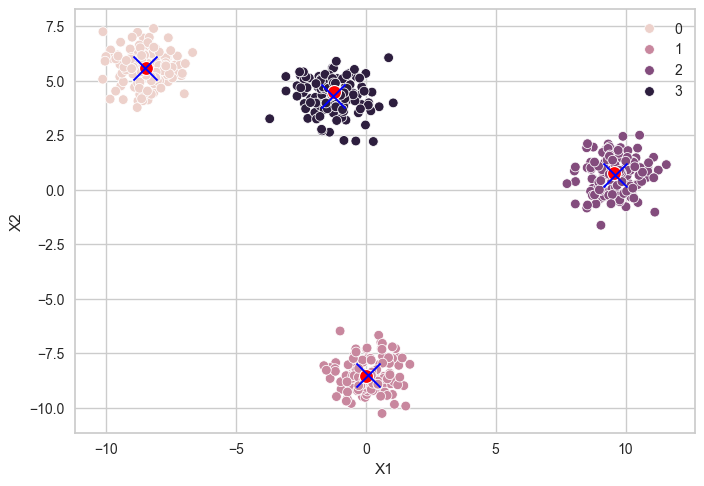

In [13]:
sns.scatterplot(data = df_blobs, x = 'X1', y = 'X2', hue = 'cluster') # graficamos los datos y diferenciamos el color del cluster con la predicción
sns.scatterplot(data = df_centers, x = 'X1', y = 'X2', color = 'red', marker = 'o', s = 100) # centroides reales de la data
sns.scatterplot(data = df_kmeans_center, x = 'X1', y = 'X2', s = 300, color = 'blue', marker = 'x') # Centroides predichos

Podemos observar que los centroides predichos son muy similares a los reales por lo que aparentemente el modelo funciona.

* El valor de "K" lo pusimos manualmente debido a lo evidente de los clusters,pero no siempre es asi. dicho lo anterior, existen varias formas de obtener ese K que se ajuste mejor a los datos. 

* En esta oportunidad lo haremos con el "Metodo del codo (Elbow)", consiste en graficar la suma de los errores cuadraticos de cada "K" y elegir el menor "K" antes de que sea despreciable la diferencia si aumentan los "K".

* Tambien, para determinar el "K" se utiliza el "Coeficiente de silueta" para saber que tan bien segmentados estan los cluster en comparación a otros clusters. Aqui se utiliza el coeficiente de silueta mas alto.

##### Crearemos una función que permita vizualizar la clusterización según distintos K

In [14]:
def vis_cluster(k):
    Kmeans = KMeans(n_clusters = k) # pusimos 4 centroides debido a lo evidente de la grafica.
    df_clusters = Kmeans.fit_predict(X)

    df_blobs['cluster'] = df_clusters # agregamos al DF la columna de predicción
    Kmeans_centers = Kmeans.cluster_centers_ #estos son los centroides que me da el modelo

    df_kmeans_center = pd.DataFrame({
        'X1' : Kmeans_centers[ : , 0],
        'X2' : Kmeans_centers[ : , 1]
    })

    sns.scatterplot(data = df_blobs, x = 'X1', y = 'X2', hue = 'cluster') # graficamos los datos y diferenciamos el color del cluster con la predicción
    sns.scatterplot(data = df_centers, x = 'X1', y = 'X2', color = 'red', marker = 'o', s = 100) # centroides reales de la data
    sns.scatterplot(data = df_kmeans_center, x = 'X1', y = 'X2', s = 300, color = 'blue', marker = 'x') # Centroides predichos
    plt.show();

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


El K utilizado es: 2


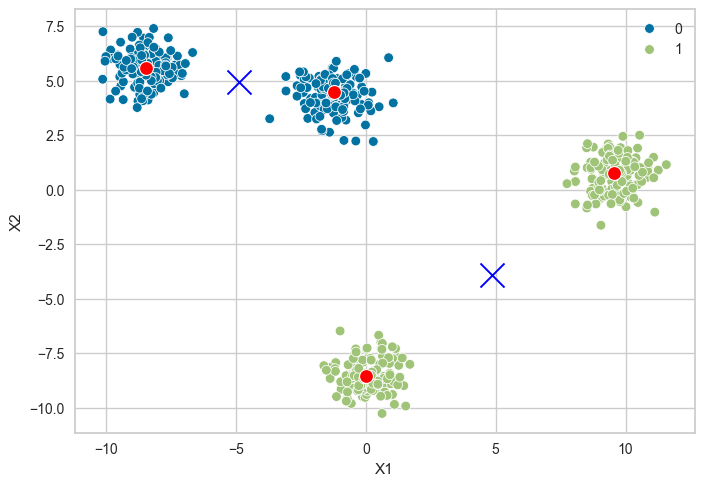

El K utilizado es: 3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


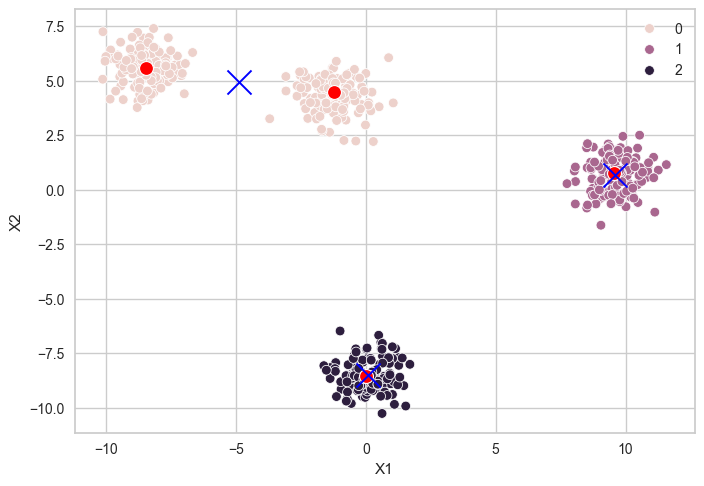

El K utilizado es: 4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


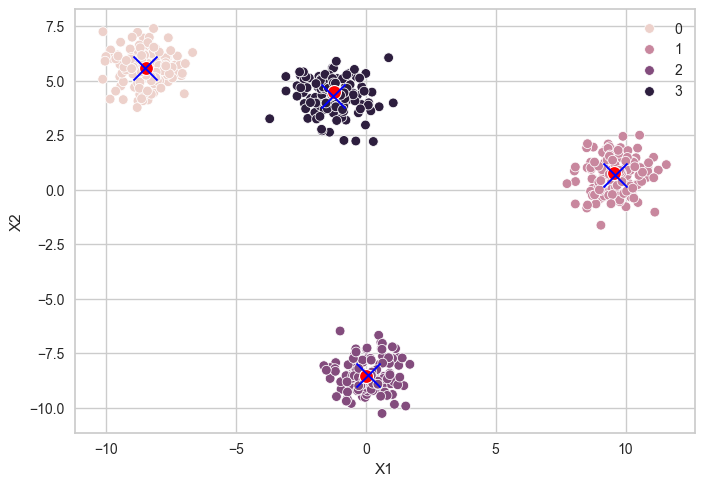

In [15]:
for i in range(2,5):
    print('El K utilizado es:' ,i)
    vis_cluster(i)

### Entrenando el calor de K

In [16]:
sum_of_squared_distances = []
k = range(2,15)

for i in k:
    km = KMeans(n_clusters = i)
    km_ajustado = km.fit(X)
    sum_of_squared_distances.append(km_ajustado.inertia_);

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

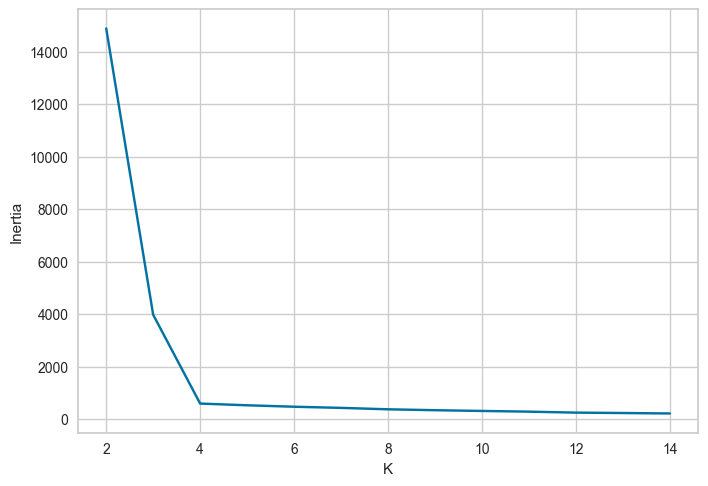

In [17]:
# Ahora visializamos el grafico de codo

plt.plot(k, sum_of_squared_distances)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

En el grafico anterior se puede observar que el K optimo es 4, ya que despues de 4 no hay cambios significativos para elegir un K mayor a 4.

Ahora graficaremos el coeficiente de silueta para comprobar el K elegido

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

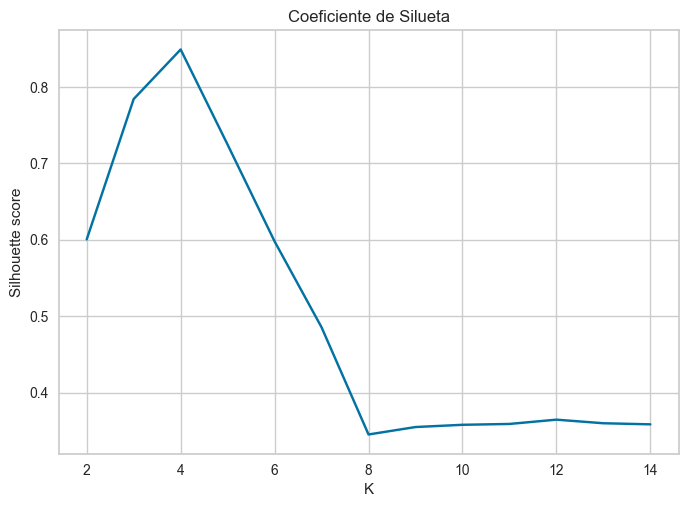

In [18]:
sil_score = []
k = range(2,15)

for i in k:
    km = KMeans(n_clusters = i)
    km_ajustado = km.fit(X)
    y_pred = km_ajustado.predict(X)
    sil_score.append(silhouette_score(X,y_pred))

plt.plot(k, sil_score)
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.title('Coeficiente de Silueta')
plt.show()

Recordar que el coeficiente de silueta entre mas alto alto mejor es su clusterización, por lo que tambien es 4.

#### Ahora graficaremos el coeficiente de silueta con el K elegido

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SilhouetteVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=4))

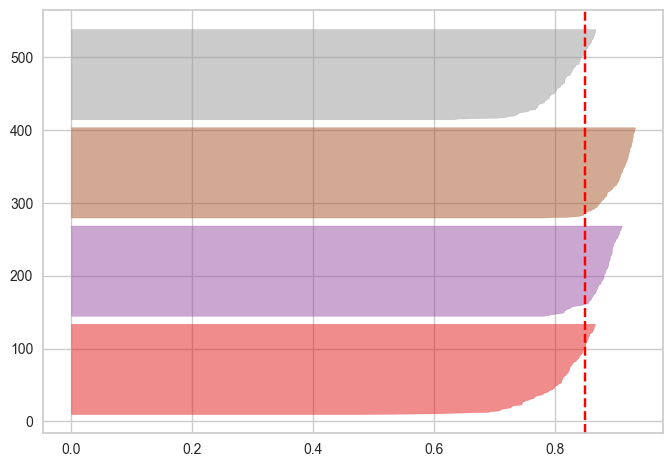

In [19]:
km = KMeans(n_clusters = 4)

visualizer = SilhouetteVisualizer(km)
visualizer.fit(X)